# Task 6.3: Geographical Visualizations with Python (NHL Player Stats Project)

### The script contain the following points:

1a)Importing libraries to computer (Pandas, NumPy, Seaborn, Matplotlib, OS, Folium, and JSON)

1b)Importing Data to Notebook / Turning Project Folder Path Into a String (NHL Players Dataset)

1c) Importing JSON File

2)Data Check

3)Adding New Columns that Define Each Team's corresponding State(US)/Providence(Canada) 

4)Data Subset

5)Choropleth Map

## 1a.Importing libraries to computer (Pandas, NumPy, Seaborn, Matplotlib, OS, Folium, and JSON)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

In [184]:
# This command propts matplotlib visuals to appear in the notebook 
%matplotlib inline

## 1b. Importing Data to Notebook / Turning Project Folder Path Into a String (NHL Players Dataset)

In [3]:
# Creating a data importing shortcut called 'path' for the NHL project folder to make importing data easier and cleaner
path =r'/Users/drewsmith/Desktop/NHL Player Stats Analysis'

In [11]:
# Utilizing the newly created 'path' shortcut to import the 'NHL Player Data' dataset
nhl_df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'nhl_players1.csv'), index_col = False)

## 1c. Importing JSON File

In [108]:
# Import ".json" file for the U.S. 

country_geo = r'/Users/drewsmith/Desktop/NHL Player Stats Analysis/us-states.json'

In [110]:
# That's just in case you want to look at the JSON file contents here too:

f = open(r'/Users/drewsmith/Desktop/NHL Player Stats Analysis/us-states.json',)
  
# returns JSON object asa dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

## 02.Data Check

In [17]:
# Noticed the import of this dataframe added a new unnecessary column
nhl_df.shape

(12270, 29)

In [19]:
nhl_df.head()

,Season,Rank,Player,Age,Position,Team,Games_Played,Goals,Assists,Points,Plus_Minus,Penalty_Minutes,Point_Shares,Even_Strength_Goals,Powerplay_Goals,Shorthanded_Goals,Game_Winning_Goals,Shots,Shooting_Percentage,Time_On_Ice,Playtime_Status,Avg_Time_On_Ice,Blocks,Hits,Faceoff_Wins,Faceoff_Losses,Faceoff_Percentage,Hart_Trophy?,Votes
0,2017,1,Connor McDavid\mcdavco01,20,C,EDM,82,30,70,100,27,26,12.8,26,3,1,6,251,12.0,1733,Top Minutes,21.133333,29.0,34,348.0,458.0,43.2,Yes,1604
1,2017,2,Sidney Crosby\crosbsi01,29,C,PIT,75,44,45,89,17,24,12.3,30,14,0,5,255,17.3,1491,Lots of Playtime,19.883333,27.0,80,842.0,906.0,48.2,No,1104
2,2017,3,Patrick Kane\kanepa01,28,RW,CHI,82,34,55,89,11,32,10.8,27,7,0,5,292,11.6,1754,Top Minutes,21.400000,15.0,28,7.0,44.0,13.7,No,206
3,2017,4,Nicklas Backstrom\backsni02,29,C,WSH,82,23,63,86,17,38,9.9,15,8,0,5,162,14.2,1497,Lots of Playtime,18.266667,33.0,45,685.0,648.0,51.4,No,60
4,2017,5,Nikita Kucherov\kucheni01,23,RW,TBL,74,40,45,85,13,38,12.0,23,17,0,7,246,16.3,1438,Lots of Playtime,19.433333,20.0,30,0.0,0.0,0.0,No,119


In [14]:
# Dropping this column since it is unnecessary 
nhl_df = nhl_df.drop(columns = ['Unnamed: 0'])

In [16]:
# Doesn't assign any options to the max number of columns so functions can display all columns
pd.options.display.max_columns = None

## 03. Adding New Columns that Define Each Team's corresponding State(US)/Providence(Canada) 

In [20]:
nhl_df['Team'].value_counts(dropna = False)

TOT    1007
VAN     406
NYI     404
EDM     398
CBJ     397
NJD     397
CHI     388
BUF     388
MIN     387
WSH     386
PHI     385
PIT     383
TOR     380
COL     379
CGY     379
DET     375
OTT     374
BOS     373
FLA     372
MTL     371
TBL     363
NSH     363
STL     361
LAK     358
DAL     355
CAR     354
NYR     351
SJS     344
ANA     332
PHX     252
WPG     196
ATL     162
ARI     103
VEG      26
MDA      21
Name: Team, dtype: int64

In [188]:
# Creating a new variable that puts team name into the corresponding state/province
nhl_df.loc[nhl_df['Team'] == 'EDM', 'State_Province'] = 'Alberta'

In [189]:
nhl_df.loc[nhl_df['Team'] == 'PIT', 'State_Province'] = 'Pennsylvania'

In [190]:
nhl_df.loc[nhl_df['Team'] == 'CHI', 'State_Province'] = 'Illinois'

In [191]:
nhl_df.loc[nhl_df['Team'] == 'VAN', 'State_Province'] = 'British Columbia'

In [192]:
nhl_df.loc[nhl_df['Team'] == 'NYI', 'State_Province'] = 'New York'

In [193]:
nhl_df.loc[nhl_df['Team'] == 'CBJ', 'State_Province'] = 'Ohio'

In [194]:
nhl_df.loc[nhl_df['Team'] == 'NJD', 'State_Province'] = 'New Jersey'

In [195]:
nhl_df.loc[nhl_df['Team'] == 'BUF', 'State_Province'] = 'New York'

In [196]:
nhl_df.loc[nhl_df['Team'] == 'MIN', 'State_Province'] = 'Minnesota'

In [197]:
nhl_df.loc[nhl_df['Team'] == 'WSH', 'State_Province'] = 'Virginia'

In [198]:
nhl_df.loc[nhl_df['Team'] == 'PHI', 'State_Province'] = 'Pennsylvania'

In [199]:
nhl_df.loc[nhl_df['Team'] == 'TOR', 'State_Province'] = 'Ontario'

In [200]:
nhl_df.loc[nhl_df['Team'] == 'COL', 'State_Province'] = 'Colorado'

In [201]:
nhl_df.loc[nhl_df['Team'] == 'CGY', 'State_Province'] = 'Alberta'

In [202]:
nhl_df.loc[nhl_df['Team'] == 'DET', 'State_Province'] = 'Michigan'

In [203]:
nhl_df.loc[nhl_df['Team'] == 'OTT', 'State_Province'] = 'Ontario'

In [204]:
nhl_df.loc[nhl_df['Team'] == 'BOS', 'State_Province'] = 'Massachusetts'

In [205]:
nhl_df.loc[nhl_df['Team'] == 'FLA', 'State_Province'] = 'Florida'

In [206]:
nhl_df.loc[nhl_df['Team'] == 'MTL', 'State_Province'] = 'Quebec'

In [207]:
nhl_df.loc[nhl_df['Team'] == 'TBL', 'State_Province'] = 'Florida'

In [208]:
nhl_df.loc[nhl_df['Team'] == 'NSH', 'State_Province'] = 'Tennessee'

In [209]:
nhl_df.loc[nhl_df['Team'] == 'STL', 'State_Province'] = 'Missouri'

In [210]:
nhl_df.loc[nhl_df['Team'] == 'LAK', 'State_Province'] = 'California'

In [211]:
nhl_df.loc[nhl_df['Team'] == 'DAL', 'State_Province'] = 'Texas'

In [212]:
nhl_df.loc[nhl_df['Team'] == 'CAR', 'State_Province'] = 'North Carolina'

In [213]:
nhl_df.loc[nhl_df['Team'] == 'NYR', 'State_Province'] = 'New York'

In [214]:
nhl_df.loc[nhl_df['Team'] == 'SJS', 'State_Province'] = 'California'

In [215]:
nhl_df.loc[nhl_df['Team'] == 'ANA', 'State_Province'] = 'California'

In [216]:
nhl_df.loc[nhl_df['Team'] == 'MDA', 'State_Province'] = 'California'

In [217]:
nhl_df.loc[nhl_df['Team'] == 'PHX', 'State_Province'] = 'Arizona'

In [218]:
nhl_df.loc[nhl_df['Team'] == 'ARI', 'State_Province'] = 'Arizona'

In [219]:
nhl_df.loc[nhl_df['Team'] == 'WPG', 'State_Province'] = 'Manitoba'

In [220]:
nhl_df.loc[nhl_df['Team'] == 'ATL', 'State_Province'] = 'Georgia'

In [221]:
nhl_df.loc[nhl_df['Team'] == 'VEG', 'State_Province'] = 'Nevada'

In [222]:
nhl_df.loc[nhl_df['Team'] == 'TOT', 'State_Province'] = 'Traded Mid-Season'

In [228]:
# Creating a new column order
columns = ['Season','Rank','Player','Age','Position','Team','State_Province','Games_Played','Goals','Assists','Points','Plus_Minus','Penalty_Minutes','Point_Shares','Even_Strength_Goals','Powerplay_Goals','Shorthanded_Goals','Game_Winning_Goals','Shots','Shooting_Percentage','Time_On_Ice','Playtime_Status','Avg_Time_On_Ice', 'Blocks','Hits','Faceoff_Wins', 'Faceoff_Losses','Faceoff_Percentage','Hart_Trophy?','Votes']

In [229]:
nhl_df1 = nhl_df.reindex(columns=columns)

In [230]:
nhl_df1.head(50)

,Season,Rank,Player,Age,Position,Team,State_Province,Games_Played,Goals,Assists,Points,Plus_Minus,Penalty_Minutes,Point_Shares,Even_Strength_Goals,Powerplay_Goals,Shorthanded_Goals,Game_Winning_Goals,Shots,Shooting_Percentage,Time_On_Ice,Playtime_Status,Avg_Time_On_Ice,Blocks,Hits,Faceoff_Wins,Faceoff_Losses,Faceoff_Percentage,Hart_Trophy?,Votes
0,2017,1,Connor McDavid\mcdavco01,20,C,EDM,Alberta,82,30,70,100,27,26,12.8,26,3,1,6,251,12.0,1733,Top Minutes,21.133333,29.0,34,348.0,458.0,43.2,Yes,1604
1,2017,2,Sidney Crosby\crosbsi01,29,C,PIT,Pennsylvania,75,44,45,89,17,24,12.3,30,14,0,5,255,17.3,1491,Lots of Playtime,19.883333,27.0,80,842.0,906.0,48.2,No,1104
2,2017,3,Patrick Kane\kanepa01,28,RW,CHI,Illinois,82,34,55,89,11,32,10.8,27,7,0,5,292,11.6,1754,Top Minutes,21.400000,15.0,28,7.0,44.0,13.7,No,206
3,2017,4,Nicklas Backstrom\backsni02,29,C,WSH,Virginia,82,23,63,86,17,38,9.9,15,8,0,5,162,14.2,1497,Lots of Playtime,18.266667,33.0,45,685.0,648.0,51.4,No,60
4,2017,5,Nikita Kucherov\kucheni01,23,RW,TBL,Florida,74,40,45,85,13,38,12.0,23,17,0,7,246,16.3,1438,Lots of Playtime,19.433333,20.0,30,0.0,0.0,0.0,No,119
5,2017,6,Brad Marchand\marchbr03,28,LW,BOS,Massachusetts,80,39,46,85,18,81,12.6,27,9,3,8,226,17.3,1555,Top Minutes,19.433333,35.0,51,13.0,23.0,36.1,No,184
6,2017,7,Mark Scheifele\scheima01,23,C,WPG,Manitoba,79,32,50,82,18,38,10.3,25,7,0,5,160,20.0,1624,Top Minutes,20.566667,34.0,49,635.0,826.0,43.5,No,0
7,2017,8,Leon Draisaitl\draisle01,21,C,EDM,Alberta,82,29,48,77,7,20,9.6,19,10,0,5,172,16.9,1548,Top Minutes,18.883333,36.0,41,476.0,496.0,49.0,No,0
8,2017,9,Brent Burns\burnsbr01,31,D,SJS,California,82,29,47,76,19,40,15.3,21,8,0,6,320,9.1,2039,Top Minutes,0.866667,142.0,69,0.0,0.0,0.0,No,273
9,2017,10,Vladimir Tarasenko\tarasvl01,25,RW,STL,Missouri,82,39,36,75,-1,12,10.2,30,9,0,8,286,13.6,1515,Top Minutes,18.466667,31.0,50,5.0,5.0,50.0,No,0


In [231]:
# Check for missing values
nhl_df1.isnull().sum()

Season                 0
Rank                   0
Player                 0
Age                    0
Position               0
Team                   0
State_Province         0
Games_Played           0
Goals                  0
Assists                0
Points                 0
Plus_Minus             0
Penalty_Minutes        0
Point_Shares           0
Even_Strength_Goals    0
Powerplay_Goals        0
Shorthanded_Goals      0
Game_Winning_Goals     0
Shots                  0
Shooting_Percentage    0
Time_On_Ice            0
Playtime_Status        0
Avg_Time_On_Ice        0
Blocks                 0
Hits                   0
Faceoff_Wins           0
Faceoff_Losses         0
Faceoff_Percentage     0
Hart_Trophy?           0
Votes                  0
dtype: int64

In [232]:
#Checking for duplicates
dups = nhl_df1.duplicated()

In [233]:
# No duplicates
dups.shape

(12270,)

In [234]:
# Exporting the dataset
nhl_df1.to_csv(os.path.join(path, '02 Data','Prepared Data', 'nhl_states_prov1.csv'))

## 04. Data Subset

In [235]:
# Select only the necessary columns and put them in a list called columns
columns = ['Season',
           'Team',
           'State_Province',
           'Player',
           'Point_Shares',]

In [236]:
nhl_sub = nhl_df1[columns]

In [237]:
nhl_sub.head()

,Season,Team,State_Province,Player,Point_Shares
0,2017,EDM,Alberta,Connor McDavid\mcdavco01,12.8
1,2017,PIT,Pennsylvania,Sidney Crosby\crosbsi01,12.3
2,2017,CHI,Illinois,Patrick Kane\kanepa01,10.8
3,2017,WSH,Virginia,Nicklas Backstrom\backsni02,9.9
4,2017,TBL,Florida,Nikita Kucherov\kucheni01,12.0


<AxesSubplot: xlabel='Point_Shares', ylabel='Count'>

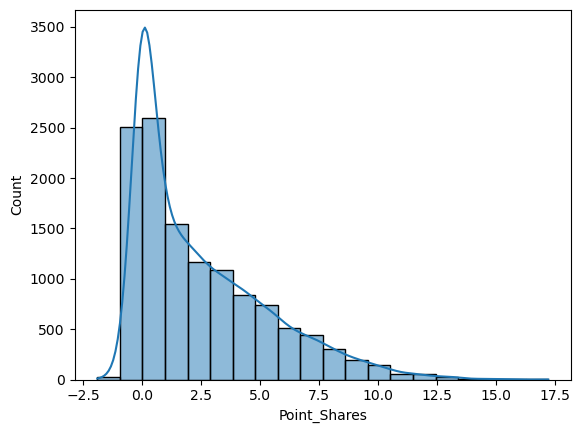

In [238]:
# shows extreme values for 'hits'
sns.histplot(nhl_sub['Point_Shares'], bins=20, kde = True) 

<AxesSubplot: xlabel='Point_Shares', ylabel='Count'>

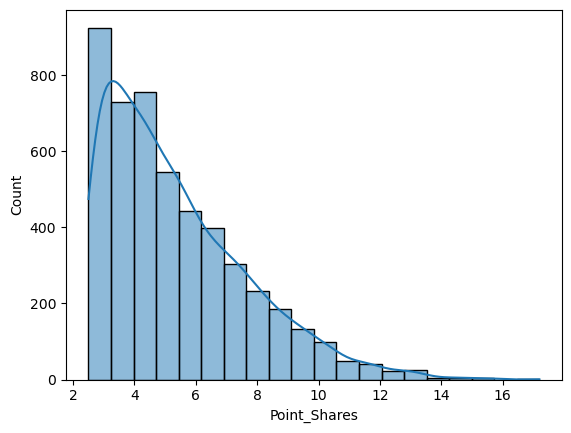

In [294]:
# shows extreme values for 'hits'
sns.histplot(nhl_sub1['Point_Shares'], bins=20, kde = True)

In [293]:
# Select only entries with a non-zero rating

nhl_sub1 = nhl_sub[nhl_sub['Point_Shares'] >= 2.5]

In [289]:
nhl_sub1.shape

(4905, 5)

In [290]:
# Create a data frame with just the states/provinces and point_shares 
data_to_plot = nhl_sub1[['State_Province','Point_Shares']]
data_to_plot.head()

,State_Province,Point_Shares
0,Alberta,12.8
1,Pennsylvania,12.3
2,Illinois,10.8
3,Virginia,9.9
4,Florida,12.0


## 05. Choropleth Map

In [291]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [40, -98], zoom_start = 4)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot,
    columns = ['State_Province', 'Point_Shares'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Point_Shares").add_to(map)
folium.LayerControl().add_to(map)

map

In [292]:
map.save('plot_data.html')

## 06.Results

### The results did not answer any of my existing research questions. I tried to use a variable I wanted to cover in my existing questions but the results in the map gave some poor results due to a limited scale of data in the top right of the map. I changed the variable to something with a smaller number like point_shares which gave better results. Point shares meaning, an estimated amount of win/overtime points a player has single handedly earned for his team in a season. I was having a very hard time trying to find JSON files that had Canadian provinces combined with US states so I ended up using the JSON file in the task example.

### Regarding the results of the map, the scale on the top right doesn't show the whole scale of point_shares but I chose a scale pretty much in the middle of the histogram I created above. With the scale I chose, states like Minnesota, North Carolina, and California had the highest point shares. This means that these teams had the most players with the higher end of the point share values within the scale above in the league. The states with the lightest shade didn't have many players that would single handedly win games for them in a season.

### These results led to a few new questions which are, "Which teams/states have the highest and lowest point shares" and "Do the players with the highest point shares in a season result in winning the hart trophy?" 